In [1]:
cd /g/data/jk72/deg581/apom/ana/notebooks

/g/data/jk72/deg581/apom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/110605044.gadi-pbs'

In [5]:
# special addition because x_rho and y_rho are in grd file only - update this to remove once re-run
grd = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_v11_grd.nc')
# ds['x_rho'] = grd.x_rho
# ds['y_rho'] = grd.y_rho

# load access forcing

In [6]:
# access_path = os.path.join('/g/data/ik11/outputs/access-om2-01/01deg_jra55v150_iaf_cycle1/')
# access_sub_paths = ['./output196/ocean/','./output197/ocean/','./output198/ocean/','./output199/ocean/']


# #temp 
# file_list=[]
# file_name_format = 'ocean-3d-temp-1-monthly-mean-ym_2007_*.nc'
# for subfolder in access_sub_paths:
#     file_list = file_list+glob.glob(access_path+subfolder+file_name_format)
# theta_full = xr.open_mfdataset(file_list,decode_times=True)

# # #salt
# file_list=[]
# file_name_format = 'ocean-3d-salt-1-monthly-mean-ym_2007_*.nc'
# for subfolder in access_sub_paths:
#     file_list = file_list+glob.glob(access_path+subfolder+file_name_format)
# salt_full = xr.open_mfdataset(file_list,decode_times=True)

# # #uvel
# file_list=[]
# file_name_format = 'ocean-3d-u-1-monthly-mean-ym_2007_*.nc'
# for subfolder in access_sub_paths:
#     file_list = file_list+glob.glob(access_path+subfolder+file_name_format)
# uvel_full = xr.open_mfdataset(file_list,decode_times=True)

# # #vvel
# file_list=[]
# file_name_format = 'ocean-3d-v-1-monthly-mean-ym_2007_*.nc'
# for subfolder in access_sub_paths:
#     file_list = file_list+glob.glob(access_path+subfolder+file_name_format)
# vvel_full = xr.open_mfdataset(file_list,decode_times=True)

In [7]:
# grd.lon_rho.min().values, grd.lon_rho.max().values,grd.lat_rho.min().values, grd.lat_rho.max().values

# grd_lon_ax = np.array((grd.lon_rho.min().values*0.9, grd.lon_rho.max().values*1.1))
# grd_lat_ax = np.array((grd.lat_rho.min().values*1.1, grd.lat_rho.max().values*0.9))

# print('re-mapping')
# salt_full =    salt_full.assign_coords({'xt_ocean': (salt_full['xt_ocean'] + 360) % 360}).sortby('xt_ocean')
# theta_full = theta_full.assign_coords({'xt_ocean': (theta_full['xt_ocean'] + 360) % 360}).sortby('xt_ocean')
# uvel_full =    uvel_full.assign_coords({'xu_ocean': (uvel_full['xu_ocean'] + 360) % 360}).sortby('xu_ocean')
# vvel_full =    vvel_full.assign_coords({'xu_ocean': (vvel_full['xu_ocean'] + 360) % 360}).sortby('xu_ocean')

# # subset
# print('subsetting')
# salt = salt_full.sel(yt_ocean=slice(*grd_lat_ax),xt_ocean=slice(*grd_lon_ax))
# theta = theta_full.sel(yt_ocean=slice(*grd_lat_ax),xt_ocean=slice(*grd_lon_ax))
# uvel = uvel_full.sel(yu_ocean=slice(*grd_lat_ax),xu_ocean=slice(*grd_lon_ax))
# vvel = vvel_full.sel(yu_ocean=slice(*grd_lat_ax),xu_ocean=slice(*grd_lon_ax))
# # salt.salt.isel(time=0,st_ocean=20).plot(vmin=35.4,vmax=35.8)

In [8]:
# access_u = uvel.u.isel(time=0,st_ocean=0).load()
# access_v = vvel.v.isel(time=0,st_ocean=0).load()


# load forcing file 

In [56]:
# special addition because x_rho and y_rho are in grd file only - update this to remove once re-run
frc_shf = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_tamura+era_shflux.nc')
frc_swf = xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_tamura+era_swflux.nc')

print('min:',frc_shf.shflux.min().values,'max:',frc_shf.shflux.max().values)


min: -745.4877206042794 max: 159.45195469281427


In [51]:
frc_sus =  xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_tamura+era_sustr.nc')
print('min:',frc_sus.sustr.min().values,'max:',frc_sus.sustr.max().values)


min: -0.5517142062887956 max: 0.9653991492334107


In [53]:
frc_svs =  xr.open_dataset('/g/data/jk72/deg581/apom/frc/amery_v2km_tamura+era_svstr.nc')
print('min:',frc_svs.svstr.min().values,'max:',frc_svs.svstr.max().values)


min: -0.6496280069529468 max: 1.6208502132500973


In [57]:
print('min:',frc_swf.swflux.min().values,'max:',frc_swf.swflux.max().values)


min: -53.58404624201207 max: 14.722386975387709


In [60]:
test = xr.open_dataset('/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_stflx/roms_his_0001.nc')

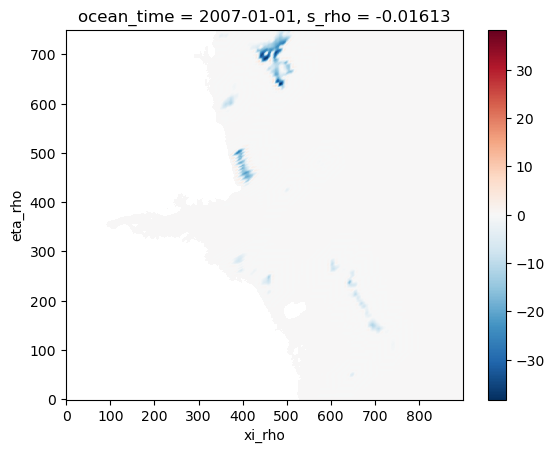

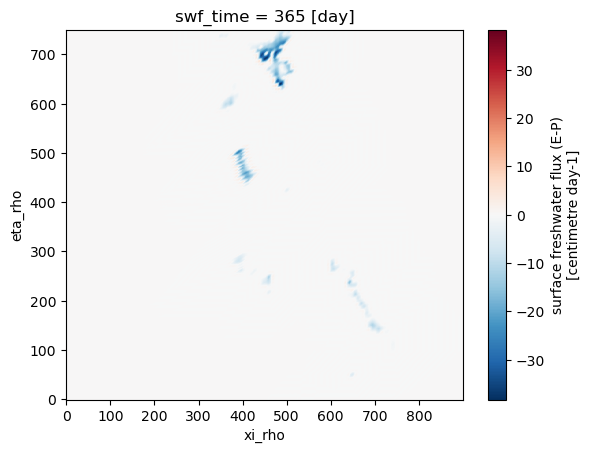

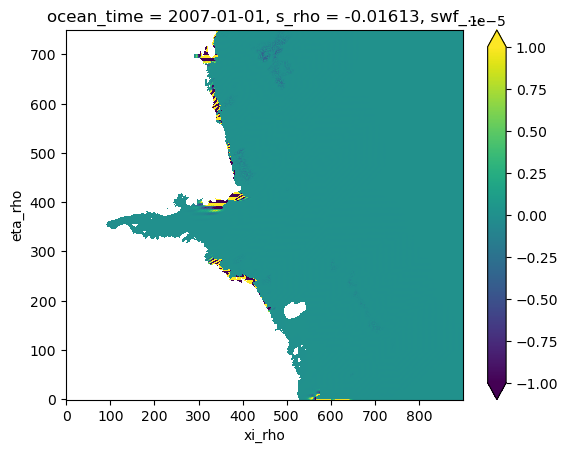

In [71]:
(test.ssflux/test.salt.isel(s_rho=-1)).plot()
plt.show()
frc_swf.swflux.isel(swf_time=-1).plot()
plt.show()
(test.ssflux/test.salt.isel(s_rho=-1) - frc_swf.swflux.isel(swf_time=-1)).plot(vmin=-1e-5,vmax=1e-5)


# now compare velocities to start with

In [42]:
print(frc_shf.shflux.min(),frc_shf.shflux.max(),frc_swf.swflux.min(),frc_swf.swflux.max())

<xarray.DataArray 'shflux' ()>
array(-745.4877206) <xarray.DataArray 'shflux' ()>
array(159.45195469) <xarray.DataArray 'swflux' ()>
array(-53.58404624) <xarray.DataArray 'swflux' ()>
array(14.72238698)


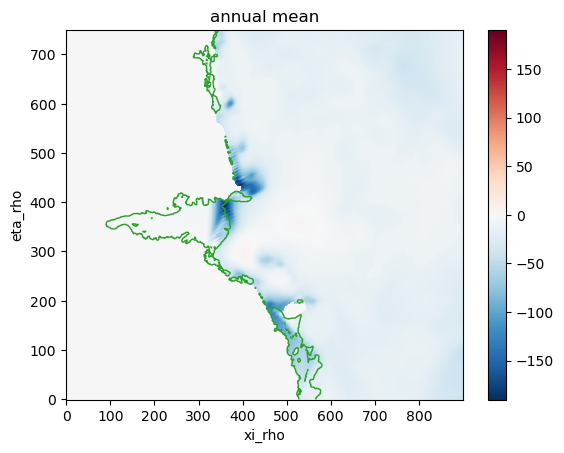

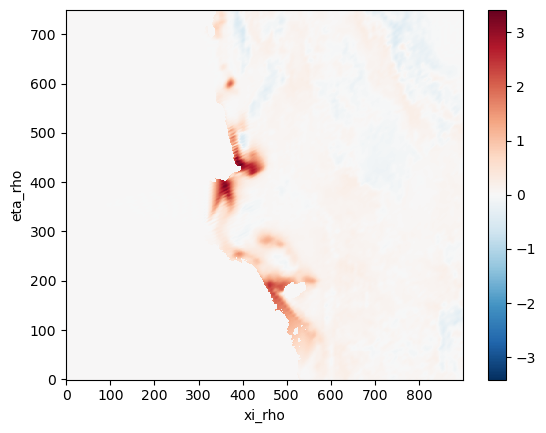

In [15]:
(frc_shf.shflux.mean(dim='shf_time')*grd.mask_rho).plot()
plt.contour(grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
plt.title('annual mean')
plt.show()
(frc_swf.swflux.mean(dim='swf_time')*grd.mask_rho).plot()
plt.contour(grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)


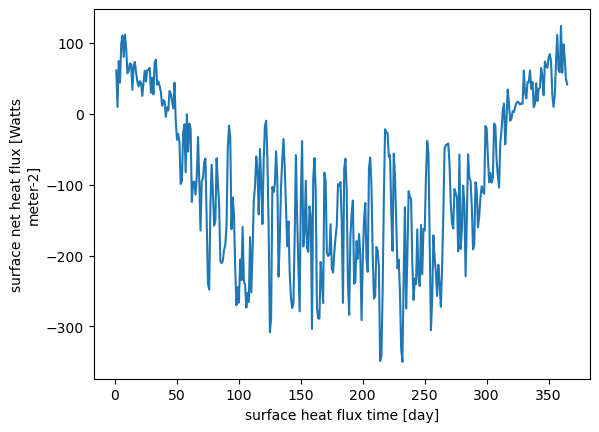

In [20]:
frc_shf.shflux.isel(xi_rho=410,eta_rho=420).plot()

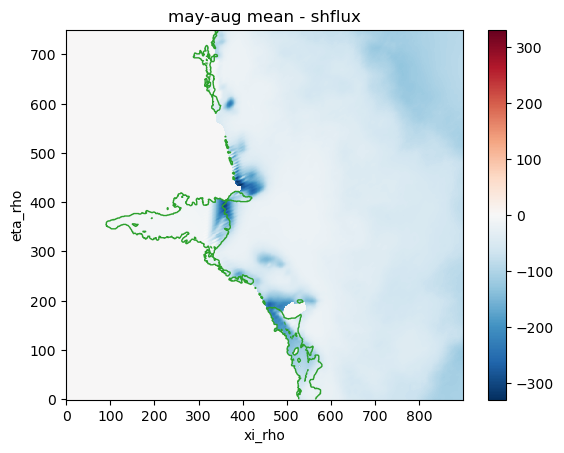

Text(0.5, 1.0, 'may-aug mean - swflux')

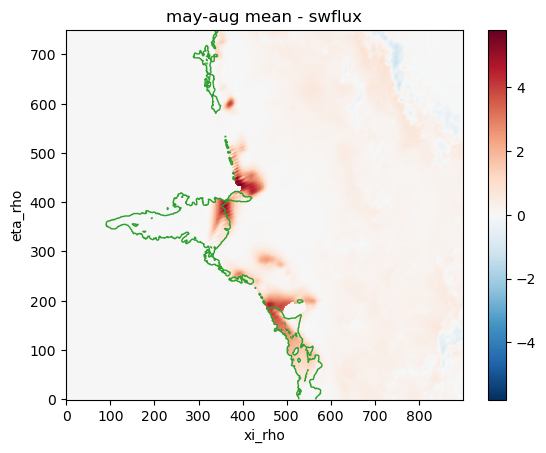

In [22]:

time_bnd = slice(122,244)
(frc_shf.shflux.sel(shf_time=time_bnd).mean(dim='shf_time')*grd.mask_rho).plot()
plt.contour(grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
plt.title('may-aug mean - shflux')
plt.show()
(frc_swf.swflux.sel(swf_time=time_bnd).mean(dim='swf_time')*grd.mask_rho).plot()
plt.contour(grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
plt.title('may-aug mean - swflux')


In [ ]:
# #access
# plt.quiver(access_u.xu_ocean[0:-1:5],access_u.yu_ocean[0:-1:5],access_u[0:-1:5,0:-1:5],access_v[0:-1:5,0:-1:5])
# plt.title('access surface velocities at2007-01-16T12:00:00')
# plt.axis((93,103,-67,-62))

In [ ]:
# roms_ue = ds.u_eastward.sel(ocean_time='2013-01-16',method='nearest').isel(s_rho=-1)
# roms_vn = ds.v_northward.sel(ocean_time='2013-01-16',method='nearest').isel(s_rho=-1)

In [ ]:
# #access
# plt.quiver(grd.lon_rho[0:-1:5,0:-1:5],grd.lat_rho[0:-1:5,0:-1:5],roms_ue[0:-1:5,0:-1:5],roms_vn[0:-1:5,0:-1:5])
# plt.title('roms  surface velocities at 2007-01-16')
# plt.axis((93,103,-67,-62))

# load model output

In [26]:


FilePath='/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_Tcline150/' # Truth file settings
prefix='roms_his_'
timeRange = [12,13]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')

['/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_Tcline150/roms_his_0012.nc']
255.264537416 G


In [27]:
ds = ds.drop_vars(['Tb','Sb','ubar_eastward','vbar_northward','w','sustr','svstr','m','zeta','rho','temp','salt','rho','u','v','u_eastward','v_northward'])
print(ds.nbytes/1e9,'G')
ds

2.068125416 G


<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 31, s_w: 32, eta_rho: 750,
                    xi_rho: 900, eta_u: 750, xi_u: 899, eta_v: 749, xi_v: 900,
                    eta_psi: 749, xi_psi: 899, ocean_time: 365)
Coordinates:
  * s_rho          (s_rho) float64 -0.9839 -0.9516 -0.9194 ... -0.04839 -0.01613
  * s_w            (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.06452 -0.03226 0.0
    x_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(750, 900), meta=np.ndarray>
    y_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(750, 900), meta=np.ndarray>
    x_u            (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    y_u            (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    x_v            (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    y_v            (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    x_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
    y_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2017-12-30 ... 2018-12-29
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/72)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    mask_rho       (eta_rho, xi_rho) float64 dask.array<chunksize=(750, 900), meta=np.ndarray>
    mask_u         (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    mask_v         (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    mask_psi       (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
    shflux         (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 750, 900), meta=np.ndarray>
    ssflux         (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 750, 900), meta=np.ndarray>
Attributes: (12/34)
    file:              roms_his_0012.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           ROMS/TOMS, Version 4.1, Sunday - March 3, 2024 -  3:15...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...

In [28]:
ds.load()

<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 31, s_w: 32, eta_rho: 750,
                    xi_rho: 900, eta_u: 750, xi_u: 899, eta_v: 749, xi_v: 900,
                    eta_psi: 749, xi_psi: 899, ocean_time: 365)
Coordinates:
  * s_rho          (s_rho) float64 -0.9839 -0.9516 -0.9194 ... -0.04839 -0.01613
  * s_w            (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.06452 -0.03226 0.0
    x_rho          (eta_rho, xi_rho) float64 1.501e+06 1.503e+06 ... 3.299e+06
    y_rho          (eta_rho, xi_rho) float64 1e+03 1e+03 ... 1.499e+06 1.499e+06
    x_u            (eta_u, xi_u) float64 1.502e+06 1.504e+06 ... 3.298e+06
    y_u            (eta_u, xi_u) float64 1e+03 1e+03 ... 1.499e+06 1.499e+06
    x_v            (eta_v, xi_v) float64 1.501e+06 1.503e+06 ... 3.299e+06
    y_v            (eta_v, xi_v) float64 2e+03 2e+03 ... 1.498e+06 1.498e+06
    x_psi          (eta_psi, xi_psi) float64 1.502e+06 1.504e+06 ... 3.298e+06
    y_psi          (eta_psi, xi_psi) float64 2e+03 2e+03 ... 1.498e+06 1.498e+06
  * ocean_time     (ocean_time) datetime64[ns] 2017-12-30 ... 2018-12-29
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/72)
    ntimes         int32 525600
    ndtfast        int32 40
    dt             float64 60.0
    dtfast         float64 1.5
    dstart         datetime64[ns] 2007-01-01
    nHIS           int32 1440
    ...             ...
    mask_rho       (eta_rho, xi_rho) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    mask_u         (eta_u, xi_u) float64 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    mask_v         (eta_v, xi_v) float64 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    mask_psi       (eta_psi, xi_psi) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0
    shflux         (ocean_time, eta_rho, xi_rho) float32 nan nan nan ... 0.0 0.0
    ssflux         (ocean_time, eta_rho, xi_rho) float32 nan nan nan ... 0.0 0.0
Attributes: (12/34)
    file:              roms_his_0012.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           ROMS/TOMS, Version 4.1, Sunday - March 3, 2024 -  3:15...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...

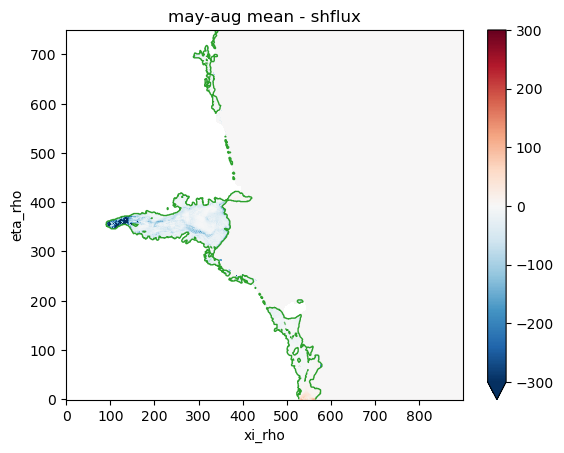

Text(0.5, 1.0, 'may-aug mean - ssflux')

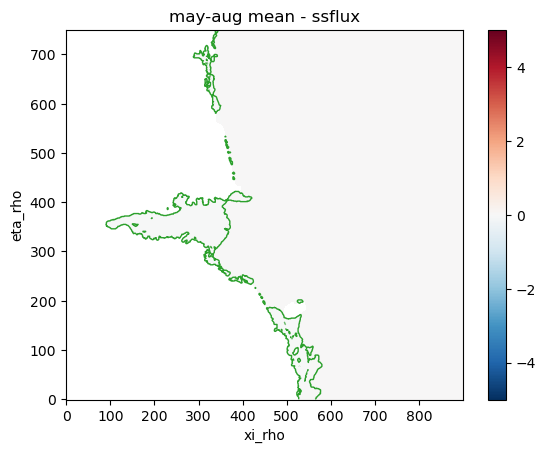

In [47]:

time_bnd = slice(200,243)
(ds.shflux.isel(ocean_time=time_bnd).mean(dim='ocean_time')*grd.mask_rho).plot(vmin=-300,vmax=300,cmap='RdBu_r')
plt.contour(grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
plt.title('may-aug mean - shflux')
plt.show()
(ds.ssflux.isel(ocean_time=time_bnd).mean(dim='ocean_time')*grd.mask_rho).plot(vmin=-5,vmax=5,cmap='RdBu_r')
plt.contour(grd.zice*grd.mask_rho,levels=(-1,0),colors='C2',linestyles='-',linewidths=1)
plt.title('may-aug mean - ssflux')


# check rotation angles

In [ ]:
angle1 = grd.lon_rho/180.0*np.pi

plt.pcolormesh(np.rad2deg(angle1))
plt.colorbar()


In [ ]:

_,dxdxi = np.gradient(grd.lon_rho)
_,dydxi = np.gradient(grd.lat_rho)

angle2 = np.arctan2(dydxi,dxdxi)
print('I''m really not sure if this is correct!')

plt.pcolormesh(np.rad2deg(angle2))
plt.colorbar()
plt.title('angle [converted to degrees] between XI-axis and EAST')

# Plot boundrya forcing temp/salt/velocity

In [ ]:
grd
# set any grid data here.

Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho0 = (ds.zice) + ((ds.zice) + ds.h) * Zo_rho
    
ds.coords['z_rho0'] = z_rho0.where(ds.mask_rho, 0).transpose('s_rho', 'eta_rho', 'xi_rho')





In [ ]:
# model-south(bottom) boundary
plt
plt.pcolormesh(ds.x_rho.isel(eta_rho=0),ds.z_rho0.isel(eta_rho=0),frc.temp_south.isel(temp_time=3),cmap='cmo.thermal')
plt.colorbar()

In [ ]:
# model-north(top) boundary
tt=0
plt.pcolormesh(ds.x_rho.isel(eta_rho=-1),ds.z_rho0.isel(eta_rho=-1),frc.temp_north.isel(temp_time=tt),cmap='cmo.thermal')
plt.colorbar()

In [ ]:
# model-east(right) boundary
tt=0
plt.pcolormesh(ds.x_rho.isel(xi_rho=-1),ds.z_rho0.isel(xi_rho=-1),frc.temp_east.isel(temp_time=tt),cmap='cmo.thermal')
plt.colorbar()

# movies

In [ ]:
# model-south(bottom) boundary
plt
plt.pcolormesh(ds.x_rho.isel(eta_rho=0),ds.z_rho0.isel(eta_rho=0),frc.temp_south.isel(temp_time=3),cmap='cmo.thermal')
plt.colorbar()

In [ ]:
import matplotlib.animation as animation

temp=frc.temp_south
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))
# Plot the initial frame.
cax = plt.pcolormesh(ds.x_rho.isel(eta_rho=0),ds.z_rho0.isel(eta_rho=0),temp.isel(temp_time=3),
    cmap='cmo.thermal',
    vmin=-2, vmax=0,
)
plt.colorbar(extend='neither')
plt.close()
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(temp.isel(temp_time=frame).values.flatten())
    ax.set_title("Time = " + str(temp.coords['temp_time'].values[frame]))
# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=12,       # Could also be iterable or list
    interval=200     # ms between frames
)

from IPython.display import HTML
HTML(ani.to_jshtml())